In [1]:
import numpy as np

In [2]:
!pip install scikit-fuzzy

^C


In [3]:
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [4]:
# Generate universe variables
#   * Water and Time
#   * cooked rice
x_temp = np.arange(20, 81, 1)
x_time = np.arange(10, 61, 1)
x_rice  = np.arange(0, 11, 1)

# Generate fuzzy membership functions
temp_lo = fuzz.trimf(x_temp, [0, 20, 50])
temp_md = fuzz.trimf(x_temp, [20, 50, 80])
temp_hi = fuzz.trimf(x_temp, [50, 80, 80])
time_lo = fuzz.trimf(x_time, [0, 10,35 ])
time_md = fuzz.trimf(x_time, [10, 35, 60])
time_hi = fuzz.trimf(x_time, [35, 60, 60])
rice_lo = fuzz.trimf(x_rice, [0, 0, 5])
rice_md = fuzz.trimf(x_rice, [0, 5, 10])
rice_hi = fuzz.trimf(x_rice, [5, 10, 10])

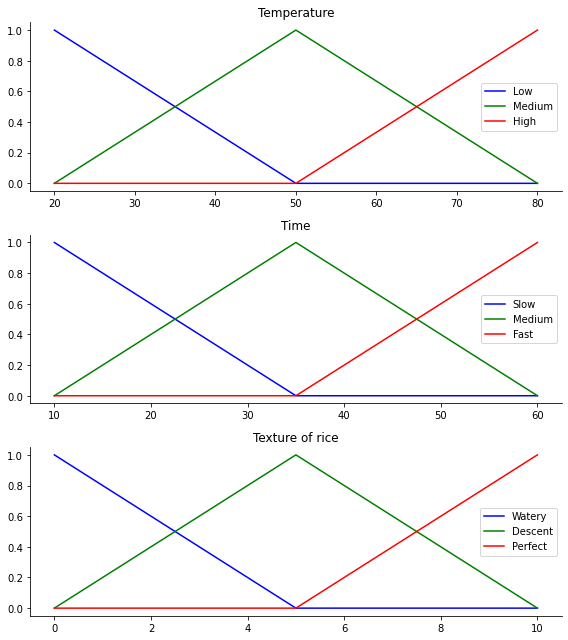

In [5]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_temp, temp_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(x_temp, temp_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_temp, temp_hi, 'r', linewidth=1.5, label='High')
ax0.set_title('Temperature')
ax0.legend()

ax1.plot(x_time, time_lo, 'b', linewidth=1.5, label='Slow')
ax1.plot(x_time, time_md, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_time, time_hi, 'r', linewidth=1.5, label='Fast')
ax1.set_title('Time')
ax1.legend()

ax2.plot(x_rice, rice_lo, 'b', linewidth=1.5, label='Watery')
ax2.plot(x_rice, rice_md, 'g', linewidth=1.5, label='Descent')
ax2.plot(x_rice, rice_hi, 'r', linewidth=1.5, label='Perfect')
ax2.set_title('Texture of rice')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

[0.66666667] [0.33333333] [0.]
0.2 0.8 0.0
[0.66666667] [0.]


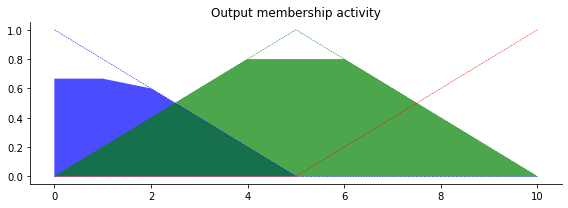

In [17]:
fo_qual=30,
serv_qual=30
qual_level_lo = fuzz.interp_membership(x_temp, temp_lo, fo_qual)
qual_level_md = fuzz.interp_membership(x_temp, temp_md, fo_qual)
qual_level_hi = fuzz.interp_membership(x_temp, temp_hi, fo_qual)
print(qual_level_lo,qual_level_md,qual_level_hi)
serv_level_lo = fuzz.interp_membership(x_time, time_lo, serv_qual)
serv_level_md = fuzz.interp_membership(x_time, time_md, serv_qual)
serv_level_hi = fuzz.interp_membership(x_time, time_hi, serv_qual)
print(serv_level_lo,serv_level_md,serv_level_hi)
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)


tip_activation_lo = np.fmin(active_rule1, rice_lo)  # removed entirely to 0

tip_activation_md = np.fmin(serv_level_md, rice_md)

active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, rice_hi)
tip0 = np.zeros_like(x_rice)
print(active_rule1,active_rule3)
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_rice, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_rice, rice_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_rice, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_rice, rice_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_rice, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_rice, rice_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [7]:
ip1=np.array([qual_level_lo,qual_level_md,qual_level_hi])
ip2=np.array([serv_level_lo,serv_level_md,serv_level_hi])

In [9]:
implicationrules=np.array([[1,1,1],[1,1,1],[1,1,1]])#0=>or,1=>and
rulebase=np.array([[0,0,0],[0,1,1],[1,2,2]])#qual[L,M,H] vs serv[L,M,H]=>1,2,3
equivalance_array=np.array([rice_lo,rice_md,rice_hi])
finalarray=np.zeros_like(equivalance_array)

In [10]:
ctr=0
ruleval=np.zeros([int(np.size(ip1)),int(np.size(ip2))])
print(ruleval)
def implicationop(imprule,ruleval,op_memfn):
  if imprule==1 :
    return np.fmin(ruleval, op_memfn)
  if imprule==0 :
    return np.fmax(ruleval, op_memfn)

for i in range(0,np.size(ip1)):
  for j in range (0,np.size(ip2)):
    
    #print(i,j,np.fmin(ip1[i],ip1[j]))
    ruleval[i,j]=np.fmin(ip1[i],ip1[j])
    if (ruleval[i,j]>0): # union method implemented, can implement alpha cut here. 
      equ_val=rulebase[i,j]
      op_memfn=equivalance_array[equ_val]
      #print(exec(op_memfn),opmem)
      currentfn=implicationop(implicationrules[i,j],ruleval[i,j],op_memfn)
      finalarray[equ_val]=np.fmax(currentfn,finalarray[equ_val])
      #print(finalarray[equ_val],equ_val,"end")


    ctr+=1
ruleval 

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


array([[0.66666667, 0.33333333, 0.        ],
       [0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.        ]])

Text(0.5, 1.0, 'Output membership activity')

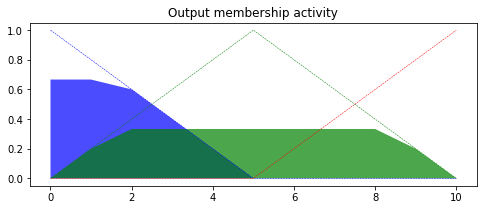

In [12]:
fig, ax0 = plt.subplots(figsize=(8, 3))
tip0 = np.zeros_like(x_rice)
#print(x_tip,tip0,tip_activation_hi)
ax0.fill_between(x_rice, tip0, finalarray[0], facecolor='b', alpha=0.7)
ax0.plot(x_rice, rice_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_rice, tip0, finalarray[1], facecolor='g', alpha=0.7)
ax0.plot(x_rice, rice_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_rice, tip0, finalarray[2], facecolor='r', alpha=0.7)
ax0.plot(x_rice, rice_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

Text(0.5, 1.0, 'Output membership activity')

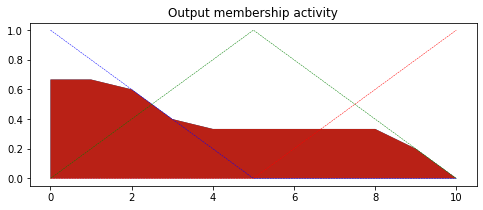

In [13]:
unionarr=np.max(finalarray,0)#union of area of method 

fig, ax0 = plt.subplots(figsize=(8, 3))
tip0 = np.zeros_like(x_rice)
#print(x_tip,tip0,tip_activation_hi)
ax0.fill_between(x_rice, tip0, unionarr, facecolor='b', alpha=0.7)
ax0.plot(x_rice, rice_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_rice, tip0, unionarr, facecolor='g', alpha=0.7)
ax0.plot(x_rice, rice_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_rice, tip0, unionarr, facecolor='r', alpha=0.7)
ax0.plot(x_rice, rice_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')